#### Loading the Dataset
Dataset of 34 images each showing the face of the same person yet having different facial expression.

In [1]:
!wget https://www.dropbox.com/s/d2xv8wses9apb64/images.zip
!unzip images.zip
!rm images.zip

--2022-03-25 16:45:37--  https://www.dropbox.com/s/d2xv8wses9apb64/images.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d2xv8wses9apb64/images.zip [following]
--2022-03-25 16:45:37--  https://www.dropbox.com/s/raw/d2xv8wses9apb64/images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbdadf6e153843390e1dc501909.dl.dropboxusercontent.com/cd/0/inline/BiKhnQzg4SFS9WMMU8TTYnbJqEz9RNCeCrXJVLrUA0XaeFuCECjxAqcrT-lonSoNGVgHyENZ3F6iXaKbPC9JNKCJ6VH1h1VDSX-PFB6_3d5nEtYjIAMqboRYKbQzl3sGGm4PW1X_85w9Q2-jrcSUCUQdfNPqPaL4_B0rCBjAE4q-1w/file# [following]
--2022-03-25 16:45:38--  https://ucbdadf6e153843390e1dc501909.dl.dropboxusercontent.com/cd/0/inline/BiKhnQzg4SFS9WMMU8TTYnbJqEz9RNCeCrXJVLrUA0XaeFuCECjxAqcrT-lonSoNGVgHyEN

(321, 261)

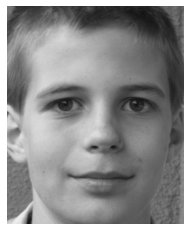

In [22]:
import cv2
import matplotlib.pyplot as plt
imag=cv2.imread('images/Jara01.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(imag);
plt.axis('off');
dims=imag.shape[:-1:]
dims

#### PCA

In [47]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
faces_array = []
n_components=4

images = sorted(os.listdir('images/'))
n_images=len(images)

for image in images:
    im = cv2.imread('images/' + image,cv2.IMREAD_GRAYSCALE)
    faces_array.append(np.asarray(im).flatten())
faces_array=np.array(faces_array)

X = faces_array.T
sklearn_pca = PCA(n_components=n_components)
X_new = sklearn_pca.fit_transform(X)
X_new.shape

(83781, 4)

#### Display Eigenfaces

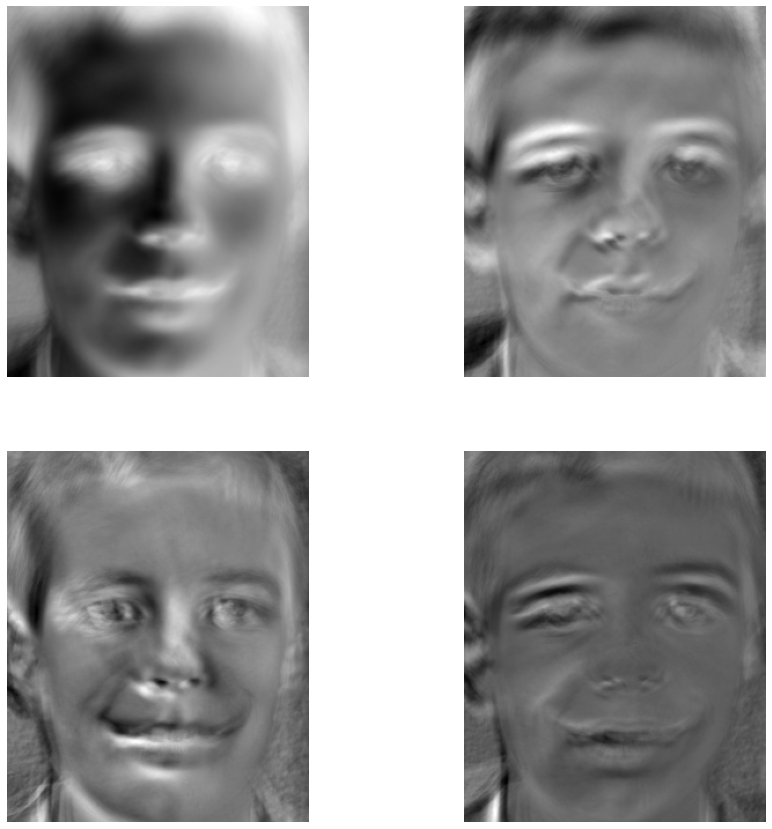

In [54]:
fig = plt.figure(figsize=(15, 15))
for i in range(n_components):
  mix=np.reshape(X_new[::,i], dims)
  fig.add_subplot(2, 2,i+1) # modify this when changing n_componenets for optimal overview
  plt.imshow(mix,cmap='gray')
  plt.axis('off')

(83781, 34)


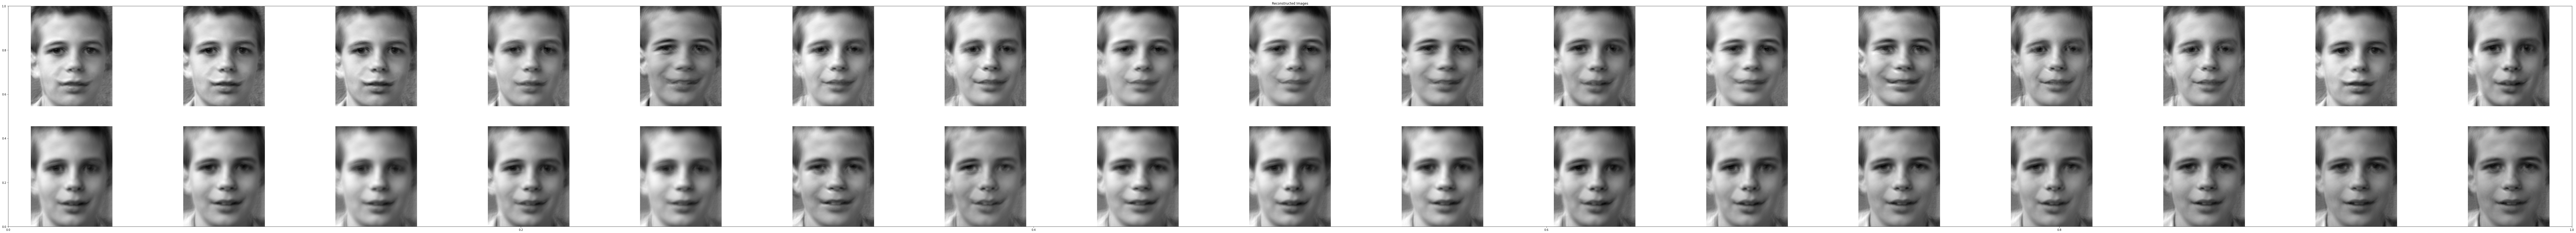

In [53]:
fig = plt.figure(figsize=(5*n_images, 15))
X_reconstructed= sklearn_pca.inverse_transform(X_new) # The PCA object mantains the eigen vecs and vals as well
print(X_reconstructed.shape)
for i in range(n_images):
  image_reconstructed = np.reshape(X_reconstructed[::,i], dims)
  fig.add_subplot(2, n_images/2,i+1) # modify this when changing n_componenets for optimal overview
  plt.imshow(image_reconstructed,cmap='gray')
  plt.axis('off')